In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/kidney_disease (2).csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
data.shape

(400, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' parameter removes one of the one-hot encoded columns to avoid multicollinearity
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data, encoded_cols], axis=1)
data.drop(categorical_cols, axis=1, inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'target_column' is the name of your target variable column
target_column = 'classification'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
data[target_column] = label_encoder.fit_transform(data[target_column])

In [ ]:
data["dm_yes"].value_counts()

0.0    266
1.0    134
Name: dm_yes, dtype: int64

In [ ]:
data["cad_no"].value_counts()

1.0    362
0.0     38
Name: cad_no, dtype: int64

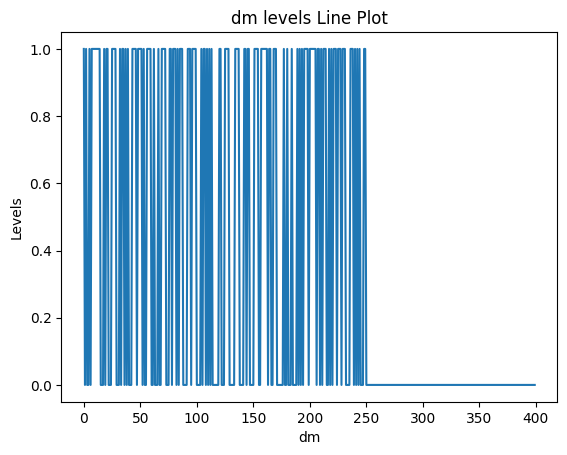

In [ ]:
# visualization
plt.plot(data['dm_yes'])
plt.xlabel("dm")
plt.ylabel("Levels")
plt.title("dm levels Line Plot")
plt.show()


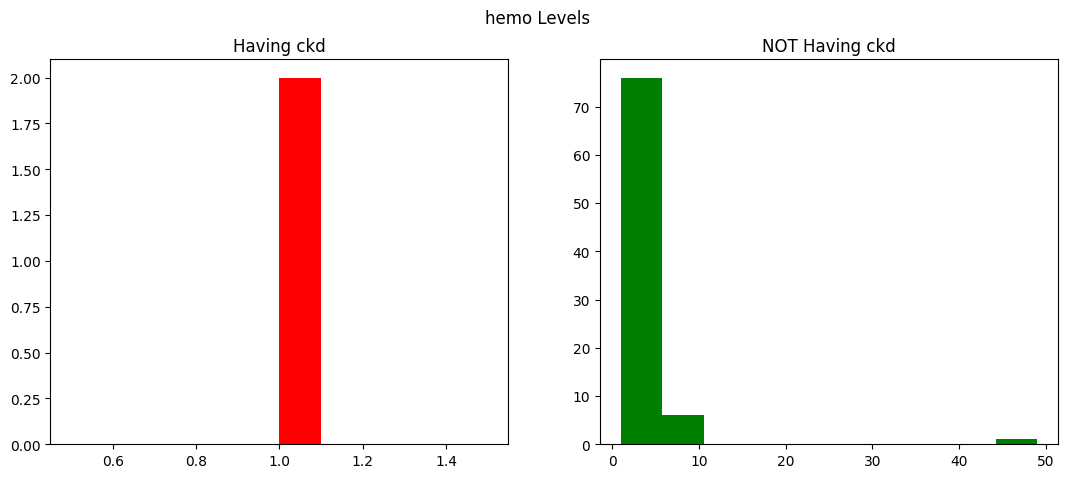

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
newdataset_len=data[data['classification']==1]['hemo'].value_counts()

ax1.hist(newdataset_len,color='red')
ax1.set_title('Having ckd')

newdataset_len=data[data['classification']==0]['hemo'].value_counts()
ax2.hist(newdataset_len,color='green')
ax2.set_title('NOT Having ckd')

fig.suptitle('hemo Levels')
plt.show()

In [ ]:
data.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
newdataset=data.drop_duplicates()

In [ ]:
newdataset=data.drop_duplicates()

In [1]:
newdataset

NameError: ignored

In [ ]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
classification    0
rbc_normal        0
rbc_nan           0
pc_normal         0
pc_nan            0
pcc_present       0
pcc_nan           0
ba_present        0
ba_nan            0
htn_yes           0
htn_nan           0
dm_\tyes          0
dm_ yes           0
dm_no             0
dm_yes            0
dm_nan            0
cad_no            0
cad_yes           0
cad_nan           0
appet_poor        0
appet_nan         0
pe_yes            0
pe_nan            0
ane_yes           0
ane_nan           0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Assuming 'target_column' is the name of your target variable
X_train, X_test, Y_train, Y_test = train_test_split(data, data['classification'], test_size=0.2, random_state=42)

In [ ]:
data

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm_nan,cad_no,cad_yes,cad_nan,appet_poor,appet_nan,pe_yes,pe_nan,ane_yes,ane_nan
0,0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.0,50.0,1.02,4.0,0.0,99.0,18.0,0.8,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,62.0,80.0,1.01,2.0,3.0,423.0,53.0,1.8,135.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,51.0,80.0,1.01,2.0,0.0,106.0,26.0,1.4,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,140.0,49.0,0.5,150.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,397,12.0,80.0,1.02,0.0,0.0,100.0,26.0,0.6,137.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
feature_names = data.columns.tolist()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# Assuming 'classification' is a variable containing the target column name
classification = 'classification'  # Replace with your actual target column name

# Select features (X) and target variable (y)
feature_columns = ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'pcc_present', 'pcc_nan', 'rbc_normal', 'rbc_nan', 'pc_normal', 'pc_nan', 'ba_present', 'ba_nan', 'htn_yes', 'dm_\tyes', 'dm_ yes', 'dm_no', 'dm_yes', 'cad_no', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes']
X = data[feature_columns]
y = data[classification]

# Replace '\t?' with NaN
X.replace('\t?', np.nan, inplace=True)

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Evaluate the model
accuracy = metrics.accuracy_score(predictions, test_Y)
print('The accuracy of the Logistic Regression model is:', accuracy)

# Display the classification report
report = classification_report(test_Y, predictions)
print("Classification Report:\n", report)




The accuracy of the Logistic Regression model is: 0.9875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           2       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



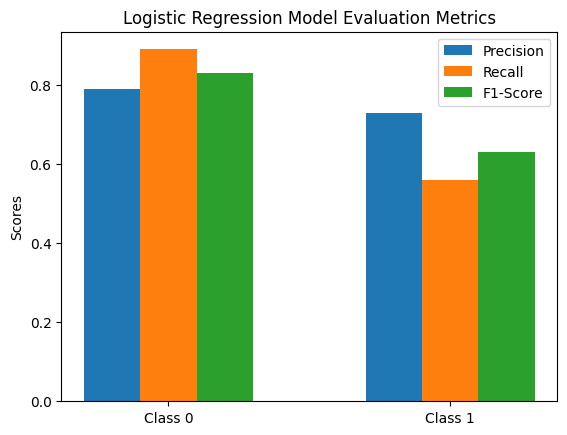

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual scores
precision = [0.79, 0.73]
recall = [0.89, 0.56]
f1_score = [0.83, 0.63]

labels = ['Class 0', 'Class 1']

# Plotting the bar chart
width = 0.2
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Logistic Regression Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming train_X, train_Y, test_X, test_Y are your training and testing data

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
train_X = imputer.fit_transform(train_X)
test_X = imputer.transform(test_X)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)



# Convert predictions to discrete classes (assuming a classification scenario)
predictions_classes = np.round(predictions).astype(int)

# Evaluate the model using accuracy (not typical for linear regression)
accuracy = accuracy_score(test_Y, predictions_classes)

print('Accuracy:', accuracy)


Accuracy: 0.7875


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming X, y are your features and target variable

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
train_X = imputer.fit_transform(train_X)
test_X = imputer.transform(test_X)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(test_Y, predictions)
print('Mean Absolute Error:', mae)

# Evaluate the model using mean squared error
mse = mean_squared_error(test_Y, predictions)
print('Mean Squared Error:', mse)

# Evaluate the model using root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Evaluate the model using R-squared
r_squared = r2_score(test_Y, predictions)
print('R-squared:', r_squared)


Mean Absolute Error: 0.3108888085175455
Mean Squared Error: 0.16534182328076183
Root Mean Squared Error: 0.40662245791490886
R-squared: 0.8183056887024596
